In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class BladesInTheDarkDice():
  def roll(self, rating, size=1):
    take_min = False

    if rating < 1:
      rating = 2
      take_min = True

    action_roll = np.random.randint(1, 7, size=(rating, size))
    if take_min:
      scores =  np.amin(action_roll, axis=0)
    else:
      scores =  np.amax(action_roll, axis=0)
      scores += (np.sum(action_roll == 6, axis=0) > 1)

    def threshold(s):
      if s <= 3:
        return 1
      elif s <= 5:
        return 2
      elif s <= 6:
        return 3
      else:
        return 4

    hits = np.array(list(map(threshold, scores))).astype("int")
    return hits

In [ ]:
class FateDice():
  pass

In [ ]:
class DuneDice():
  pass

In [ ]:
class CoriolisDice():
  def roll(self, dice=1, pray=False, size=1):
    rolls = np.random.randint(1, 7, size=(dice, size))
    if pray:
      rerolls = np.random.randint(1, 7, size=(dice, size))
      rolls = np.maximum(rolls, rerolls)
    num_hits = np.sum(rolls == 6, axis=0)


    def threshold(s):
      if s < 1:
        return 1
      elif s < 3:
        return 2
      else:
        return 3

    hits = np.array(list(map(threshold, num_hits)))
    return hits


In [ ]:
class IronswornDice():

  def roll(self, bonus=0, momentum = None, size = 1):
    if momentum is not None and momentum > -1:
      action_score = np.full((1, size), momentum)
    else:
      action_roll = np.random.randint(1, 7, size=size)
      action_score = np.minimum(10, bonus + action_roll)
      if momentum is not None and momentum < 0:
        action_score = np.where(action_roll == -momentum, bonus, action_score)

    challenge_roll = np.random.randint(1, 11, (2,size))
    num_hits = np.sum(action_score > challenge_roll, axis = 0)
    misses = num_hits == 0
    matches = challenge_roll[0, :] == challenge_roll[1, :]

    hits = np.where(matches, num_hits + 2, num_hits + 1)
    hits = np.where(np.logical_and(matches, misses), 0, hits)
    if size == 1:
      hits = hits[0]

    return hits

In [ ]:
class CityOfMistDice():

  def roll(self, power, grit=False, size=1):
    if grit:
      if power > 6:
        power = 4
      elif power > 3:
        power = 3
      elif power > 1:
        power = 2

    dice_roll = np.random.randint(1, 7, (2,size))
    scores = np.sum(dice_roll, axis=0) + power

    def threshold(s):
      if s <= 6:
        return 1
      elif s <= 9:
        return 2
      elif s <= 11:
        return 3
      else:
        return 4

    hits = np.array(list(map(threshold, scores))).astype("int")
    return hits
    

In [ ]:
class DefiantDice():

  def use_spare_potential(self, rolls, potential):
    if potential == 0:
      return rolls
    
    dice_num = rolls.shape[0]
    z = np.zeros((dice_num, 1))

    if potential > 0:
      z[0, 0] = 1
      new_potential = potential-1
    else:
      z[-1, 0] = -1
      new_potential = potential + 1

    new_rolls = np.sort(rolls + z, axis=0)
    return self.use_spare_potential(new_rolls, new_potential)


  def roll(self, potential, shard=False, size=1):

    d6s = max(0, 3 - max(0, potential))
    d10s = min(3 + int(shard), max(0, potential-3))

    if potential > 3:
      d8s = max(0, 6 + int(shard) - potential)
      spare_potential = max(0, potential - (6 + int(shard)))
    else:
      d8s = int(shard) + max(0, potential)
      spare_potential = min(0, potential)

    d6_rolls =  np.random.randint(1, 7, size=(d6s, size))
    d8_rolls = np.random.randint(1, 9, size=(d8s, size))
    d10_rolls = np.random.randint(1, 11, size=(d10s, size))

    all_rolls = np.sort(np.concatenate((d6_rolls, d8_rolls, d10_rolls), axis=0), axis=0)
    all_rolls = self.use_spare_potential(all_rolls, spare_potential)
    hits = np.sum((all_rolls >= 5), axis=0)

    return hits
    

In [ ]:
n = 1000
hits = [1, 2, 3, 4, 5]

In [ ]:
coriolis = CoriolisDice()

In [ ]:
rolls = coriolis.roll(3, pray=True, size=n)
counts = np.bincount(rolls, minlength=5)

<BarContainer object of 5 artists>

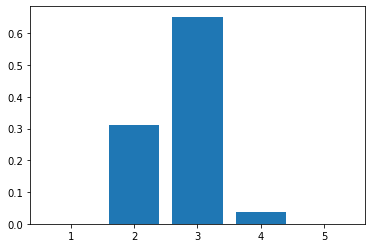

In [ ]:
plt.bar(hits, counts/np.sum(counts))

In [ ]:
ironsworn = IronswornDice()

In [ ]:
rolls = ironsworn.roll(3, size=n, momentum = -6)
counts = np.bincount(rolls, minlength=5)

<BarContainer object of 5 artists>

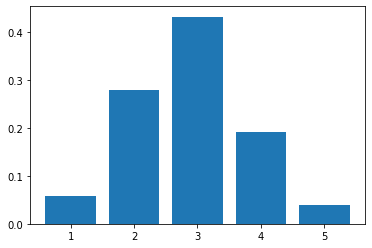

In [ ]:
plt.bar(hits, counts/np.sum(counts))

In [ ]:
citymist = CityOfMistDice()

In [ ]:
rolls = citymist.roll(0, grit = True, size=n)
counts = np.bincount(rolls, minlength=5)

<BarContainer object of 5 artists>

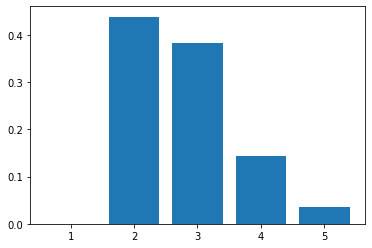

In [ ]:
plt.bar(hits, counts/np.sum(counts))

In [ ]:
defiant = DefiantDice()

In [ ]:
rolls = defiant.roll(0, shard = True, size=n)
counts = np.bincount(rolls, minlength=5)

<BarContainer object of 5 artists>

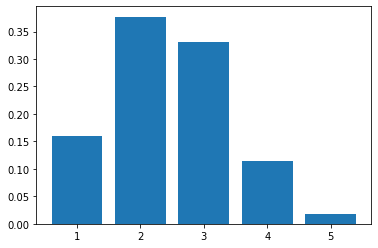

In [ ]:
plt.bar(hits, counts/np.sum(counts))

In [ ]:
blades = BladesInTheDarkDice()

In [ ]:
rolls = blades.roll(1, size=n)
counts = np.bincount(rolls, minlength=5)

<BarContainer object of 5 artists>

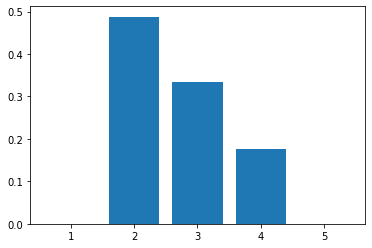

In [ ]:
plt.bar(hits, counts/np.sum(counts))